In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packa

In [2]:
from matplotlib import font_manager,rc, rcParams
import platform

if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

rcParams['axes.unicode_minus'] = False

%matplotlib inline

# 특성 자동 선택

새로우 특성을 만드는 방법이 많으므로 (구간 분할, 다항식, 상호작용 등) 데이터의 차원이 원본 특성 수 이상으로 증가하기 쉽다. 그러나 특성이 추가되면 모델은 더 복잡해지고 과적합될 가능성도 높아진다. 보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋다. 하지만 어떤 특성이 좋은지 알기 역시 쉽지 않다. 

이를 위한 전략으로 '일변량 통계(univeriate statistics)','모델 기반 선택(model-based selection)','반복적 선택(iterative selection)' 이 있다. 이 방법들은 모두 지도학습 방법이며, 훈련 세트와 테스트 세트를 나눈 다음 훈련 데이터만 특성 선택에 사용해야한다.(정보 누설을 막기 위함)


## 일변량 통계
개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산한다. 그런 다음 깊게 관련되어 있다고 판단되는 특성을 선택한다. 분류에서는 이런 방법을 분산분석(ANOVA , analysis of variance)라고도 한다. 

이 방법의 핵심 요소는 일변량, 즉 각 특성이 독립적으로 평가된다는 점이다. 따라서 다른 특성과 깊게 연관된 특성은 선택되지 않는다.<br>일변량 분석은 계산이 매우 빠르고 평가를 위해 모델을 만들 필요가 없으며, 특성을 선택한 후 적용하려는 모델에 상관없이 사용할 수 있다.

회귀에서는 f_classif(기본값)를, 회귀에서는 f_regression을 보통 선택하여 테스트하고, 계산한 p-value에 기초하여 특성을 제외하는 방식을 선택한다. 이런 방식은 매우 높은 p-value를 가진 (즉 타깃과의 연관성이 작을 것 같다) 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용한다. <br>
임계값을 계산하는 방법은 각각 다르며 가장 간단한 SelectKBest는 고정된 k개의 특성을 선택하고, SelectPercentile은 지정된 비율만큼 특성을 선택한다. 

In [26]:
# cancer데이터를 이용할 것인데 문제를 조금 복잡하게 하기 위해 의미없는 노이즈를 약간 추가
# 특성 선택이 이 의미 없는 특성을 식별해서 제거하는지 살필 것

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))

# 처음 30개까지가 원본 특성이고 다음 50개는 노이즈이다.
X_w_noise = np.hstack([cancer.data,noise])

In [27]:
print(cancer.data.shape, noise.shape, X_w_noise.shape)

(569, 30) (569, 50) (569, 80)


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.5)

# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%(매개변수 percentile)를 선택한다.
# X_train과 y_train의 관계를 통계기법으로 분석해 쓸모있는 50%의 특성을 골라낸다.
select = SelectPercentile(score_func=f_classif,percentile=50)
select.fit(X_train,y_train)
# 훈련 세트에 적용
X_train_selected = select.transform(X_train)

print(X_train.shape)

print(X_train_selected.shape)

(284, 80)
(284, 40)


결과에서 보듯 특성 개수가 80개에서 40개로 줄어들었다.<br>
get_support 메서드는 선택된 특성을 불리언 값으로 표시해주어 어떤 특성이 선택되었는지 확인할 수 있다.

In [29]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x16a4ce1da08>],
 <a list of 1 Text yticklabel objects>)

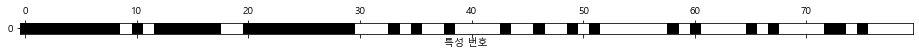

In [30]:
# 그림에서 확인하듯 대부분 원본 특성(0~29)이 선택되고 노이즈 특성(30~)이 거의 모두 제거되었다.
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr.fit(X_train,y_train)
print("전체 특성을 사용한 점수: {:.5f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print('일부 특성을 사용한 점수: {:.5f}'.format(lr.score(X_test_selected,y_test)))

전체 특성을 사용한 점수: 0.92982
일부 특성을 사용한 점수: 0.94035


일부 원본 특성이 없더라고 노이즈 특성을 제거한 쪽의 성능이 더 좋다. 다만 이 예는 인위적으로 만든 예제이고 실제 데이터에서의 결과는 보통 엇갈리는 경우가 많다. 하지만 너무 많은 특성으로 모델 만들기가 현실적으로 어려울 때 일변량 분석을 사용하여 특성을 선택하면 큰 도움이 될 수 있다. 혹은 도움 안되는 특성들이 꽤 많다는 것을 확인할 수도 있다.

## 모델 기반 특성 선택
지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해 가장 중요한 특성들만 선택한다. 특성 선택에 사용하는 지도 학습 모델은 최종적으로 사용할 지도 학습 모델과 같을 필요는 없다. 

특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서를 매길 수 있어야한다. 결정 트리와 이를 기반으로 한 모델은 각 특성의 중요도가 담겨 있는 feature_importances_ 속성을 제공한다. <br>선형 모델의 계수의 절댓값 역시 특성의 중요도를 재는데 사용할 수 있다. L1 규제를 사용할 경우 일부 특성의 계수만을 학습한다.<br>
이를 모델 자체를 위해 특성을 선택한다고 생각할 수도 있지만, 다른 모델의 특성 선택을 위한 전처리 단계로 사용할 수도 있다.

일변량 분석과는 다르게 모델 기반 특성 선택은 한 번에 모든 특성을 고려하므로 상호작용 부분을 반영항 수 있다. 모델 기반 특성 선택은 SelectFromModel에 구현되어있다.

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),
                         threshold='median')

중요도가 지정한 임계치보다 큰 모든 특성을 선택한다. median으로 선택하면 절반 가량의 특성을 선택할 수 있다.<br>
'1.2*median', '1.7*mean'처럼 중간값과 평균값의 비율로 나타낼 수도 있다.

In [33]:
# 100개의 트리로 만든 랜덤 포레스트 분류인만큼 매우 복잡하면서 일변량 분석보다 훨씬 강력한 방법이다.

select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape, X_train_l1.shape)

(284, 80) (284, 40)


([<matplotlib.axis.YTick at 0x16a4c7b0a88>],
 <a list of 1 Text yticklabel objects>)

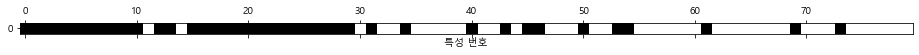

In [34]:
# 두 개를 제외한 모든 원본 특성이 선택되었다. 40개의 특성을 선택하도록 지정했으므로 일부 노이즈 특성도 같이 선택되었다.
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

In [35]:
# 성능 확인, 특성 선택이 더 잘되었으므로 성능도 약간 향상되었다.
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver='liblinear').fit(X_train_l1,y_train).score(X_test_l1,y_test)
print(score)

0.9438596491228071


## 반복적 특성 선택
일변량 분석에서는 모델을 사용하지 않았고, 모델 기반 선택에서는 하나의 모델을 사용해 특성을 선택했다.<br>
반복적 특성 선택에서는 특성의 수가 각기 다른 일련의 모델이 만들어진다. 두 가지 방법이 있다.
- 특성을 하나도 선택하지 않은 상태에서 시작해 어떤 종료 조건에 도달할 때까지 하나씩 추가하는 방법
- 모든 특성을 가지고 시작해 어떤 종료 조건이 될 때까지 특성을 하나씩 제거해나가는 방법
    -재귀적 특성 제거(RFE,recursive feature elimination)가 이런 방법의 하나이다.
    
일련의 모델이 만들어지기 때문에 계산 비용이 훨씬 많이 든다. 이를 위해 모델 기반 선택에서처럼 특성 선택에 사용할 모델은 특성의 중요도를 결정하는 방법을 제공해야한다.

참고) 회귀 모델에서 사용하는 전진 선택법과 후진 선택법은 scikit-learn에서 제공하지 않는다. 다만 $R^2$를 얻을 수 있으므로 어렵지 않게 구현할 수는 있다.

([<matplotlib.axis.YTick at 0x16a4d305948>],
 <a list of 1 Text yticklabel objects>)

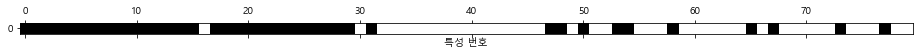

In [36]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),
            n_features_to_select=40)
select.fit(X_train,y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

일변량 방법이나 모델 기반 방법보다 좀 더 나아져 원본 특성 중에는 1개만을 누락시켰다.<br>
랜덤 포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번이나 실행된다. 당연히 시간도 오래 걸린다.

In [38]:
# 정확도 확인
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(solver='liblinear').fit(X_train_rfe,y_train).score(X_test_rfe,y_test)
print(score)

0.9508771929824561


# 전문가 지식 활용
머신러닝의 목적은 전문가가 설계하는 규칙을 만들지 않기 위해서인 경우가 많지만, 애플리케이션이나 그 분야의 전문 지식이 무시된다는 의미는 아니다. 종종 분야의 전문가는 초기 데이터에서 더 유용한 특성을 선택할 수 있도록 도움을 줄 수 있다.

https://www.citibikenyc.com/system-data 에 공개된 자전거 대여 데이터를 사용할 것

In [39]:
citibike = mglearn.datasets.load_citibike()
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

In [40]:
len(citibike)

248

Text(0, 0.5, '대여횟수')

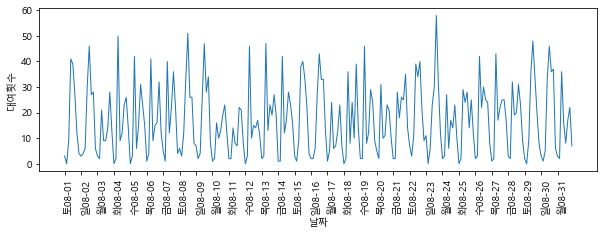

In [44]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(),end=citibike.index.max(),freq='D')
week = ['일','월','화','수','목','금','토']
xticks_name = [week[int(w)]+d for w,d in zip(xticks.strftime('%w'),xticks.strftime('%m-%d'))]

plt.xticks(xticks,xticks_name,rotation=90,ha='left')
plt.plot(citibike,linewidth=1)
plt.xlabel('날짜')
plt.ylabel('대여횟수')

낮과 밤을 확실히 구분할 수 있다. 주중과 주말의 패턴 차이 역시 확인할 수 있다. 이와 같은 시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식을 사용한다. 즉 훈련 세트와 테스트 세트를 나눌 때 어떤 날짜까지의 모든 데이터를 훈련 세트로 하고, 그 날짜 이후의 모든 데이터를 테스트 세트로 사용한다. 여기서는 23일 치 184개의 데이터를 훈련 세트로, 남은 8일 치 64개 데이터를 테스트 세트로 사용

사용할 특성은 대여가 일어난 날짜와 시간뿐이다. 컴퓨터에 날짜를 저장하는 일반적인 방법은 1970년 1월 1일 00:00:00로부터(또는 Unix시간으로부터) 경과한 시간을 초로 나타낸 POSIX 시간이다. 

우선 날짜와 시간을 하나의 숫자로 표현한 특성을 사용한다.

In [73]:
# 타깃값
y = citibike.values
# POSIX 시간을 10**9로 나누어 변환, values 메서드를 써주면 index형식을 ndarray로 바꿀 수 있음
X = citibike.index.astype('int64').values.reshape(-1,1) // (10**9)

In [77]:
n_train = 184

# 훈련 세트와 테스트 세트로 나눠 모델을 만들고 결과를 그리는 함수

def eval_on_features(features,target,regressor):
    X_train,X_test = features[:n_train],features[n_train:]
    y_train,y_test = target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print('테스트 세트 R^2: {:.2f}'.format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8),xticks_name,rotation=90,ha='left')
    
    plt.plot(range(n_train),y_train,label='훈련')
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label='테스트')
    
    plt.plot(range(n_train),y_pred_train,'--',label='훈련 예측')
    plt.plot(range(n_train,len(y_test)+n_train),y_pred,'--',label='테스트 예측')
    plt.legend(loc=(1.01,0))
    plt.xlabel('날짜')
    plt.ylabel('대여횟수')

테스트 세트 R^2: -0.04


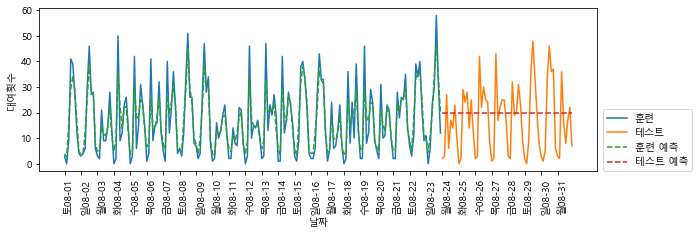

In [82]:
# 전처리가 거의 필요없는 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
eval_on_features(X,y,RandomForestRegressor(n_estimators=100,random_state=0))

훈련 세트의 예측은 매우 정확하나 테스트 세트에 대해서는 한가지 값으로만 예측했다. 당연히 학습효과는 거의 없는 것이나 마찬가지로 나왔다. 이는 트리 모델인 랜덤포레스트가 훈련 세트에 있는 특성의 범위 밖으로 외삽(extrapolation)할 수 있는 능력이 없기 때문이다. 결국 이 모델은 테스트 세트와 가장 가까운 훈련 세트의 마지막 타깃값을 예측으로 사용한다.

이보다 나은 방법을 생각해내야하는데 여기에 '전문가 지식'이 필요하다.

훈련 데이터의 대여 그래프를 보면 시간과 요일이라는 두 요소가 중요해 보인다. 그럼 이 두 특성을 추가해보도록 한다. POSIX 시간으로는 아무 것도 학습되지 않으므로 이 특성은 제외한다.

테스트 세트 R^2: 0.60


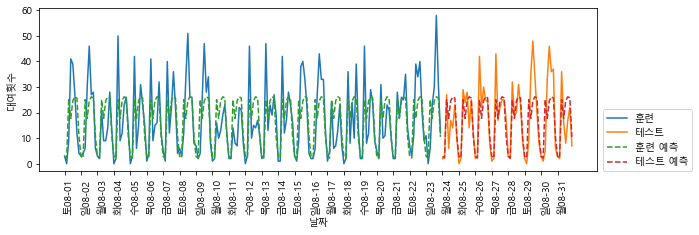

In [83]:
# 먼저 시간만
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,RandomForestRegressor(n_estimators=100,random_state=0))

테스트 세트 R^2: 0.84


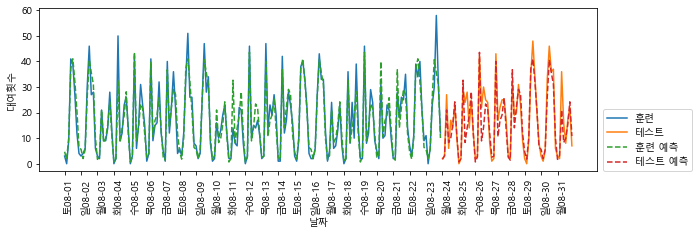

In [84]:
# 요일 정보 추가
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week,y,RandomForestRegressor(n_estimators=100,random_state=0))

이 모델이 학습한 것은 8월 23일까지 요일별, 시간별 평균 대여 횟수이다.

테스트 세트 R^2: 0.13


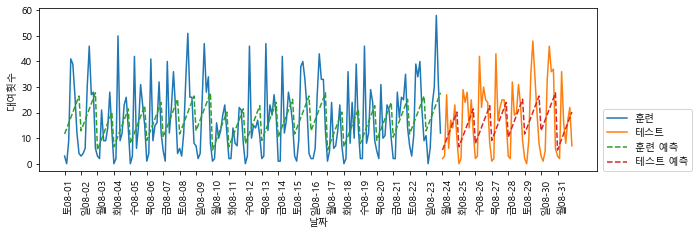

In [85]:
# 랜덤포레스트같이 복잡한 모델이 필요한 것은 아니므로 더 간단한 모델인 선형회귀를 적용
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())

성능이 훨씬 나쁘고 주기적 패턴도 이상한데 그 이유는 요일과 시간이 정수로 인코딩되어있어서 연속형 변수로 해석되기 때문이다. 선형 모델은 시간을 선형 함수로만 학습할 수 있어서, 하루에서 시간이 흐를수록 대여 수가 늘어나게 학습되었다.<br>
실제 패턴은 이보다 복잡한데 이 패턴을 잡아내기 위해 OneHotEncoder를 사용하여 정수형을 범주형 변수로 해석하도록 한다.

테스트 세트 R^2: 0.62


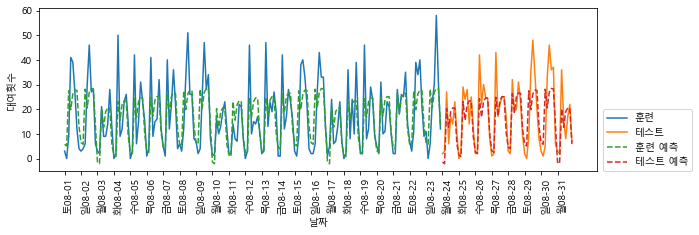

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
    
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot,y,Ridge())

이 선형 모델은 요일마다 하나의 계수를 학습하고 시간마다 하나의 계수를 학습한다. 곧 시간 패턴이 모든 날에 걸쳐 공유된다는 의미이다. <br>
상호작용 특성을 사용하면 시간과 요일의 조합별 계수를 학습할 수 있다.

테스트 세트 R^2: 0.85


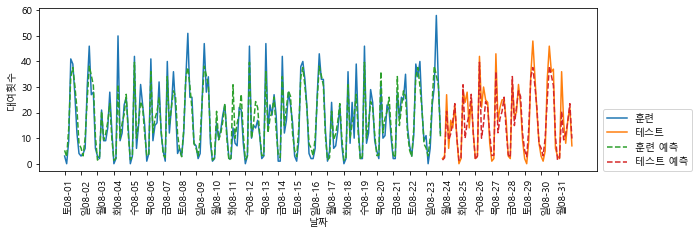

In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly,y,lr)

특성 변환을 통해 모델의 성능이 랜덤 포레스트와 거의 비슷해졌는데 이 모델의 가장 큰 장점은 무엇이 학습되었는지가 명확해졌다는 것이다. 바로 날짜와 시간에 대해 하나의 계수를 학습했는데 랜덤포레스트와 달리 이 모델이 학습한 계수를 그래프로 나타낼 수 있다.

In [90]:
hour = ['%02d:00' % i for i in range(0,24,3)]
hour

['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']

In [92]:
day = ['월','화','수','목','금','토','일']
features = day+hour

In [93]:
print(features)

['월', '화', '수', '목', '금', '토', '일', '00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']


In [94]:
features_poly = poly_transformer.get_feature_names(features)
# lr은 이미 degree=2인 상태로 학습된 상태임
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

In [101]:
print(features_poly,'\n')
# 03:00 09:00처럼 시간끼리 곱한 특성은 Ridge에서 계수가 0이므로 선택되지 않음
print(features_nonzero)

['월', '화', '수', '목', '금', '토', '일', '00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', '월 화', '월 수', '월 목', '월 금', '월 토', '월 일', '월 00:00', '월 03:00', '월 06:00', '월 09:00', '월 12:00', '월 15:00', '월 18:00', '월 21:00', '화 수', '화 목', '화 금', '화 토', '화 일', '화 00:00', '화 03:00', '화 06:00', '화 09:00', '화 12:00', '화 15:00', '화 18:00', '화 21:00', '수 목', '수 금', '수 토', '수 일', '수 00:00', '수 03:00', '수 06:00', '수 09:00', '수 12:00', '수 15:00', '수 18:00', '수 21:00', '목 금', '목 토', '목 일', '목 00:00', '목 03:00', '목 06:00', '목 09:00', '목 12:00', '목 15:00', '목 18:00', '목 21:00', '금 토', '금 일', '금 00:00', '금 03:00', '금 06:00', '금 09:00', '금 12:00', '금 15:00', '금 18:00', '금 21:00', '토 일', '토 00:00', '토 03:00', '토 06:00', '토 09:00', '토 12:00', '토 15:00', '토 18:00', '토 21:00', '일 00:00', '일 03:00', '일 06:00', '일 09:00', '일 12:00', '일 15:00', '일 18:00', '일 21:00', '00:00 03:00', '00:00 06:00', '00:00 09:00', '00:00 12:00', '00:00 15:00', '00:00 18:00', '00:00 21:00', '03:00 06:00', '03:00 09

Text(0, 0.5, '계수 크기')

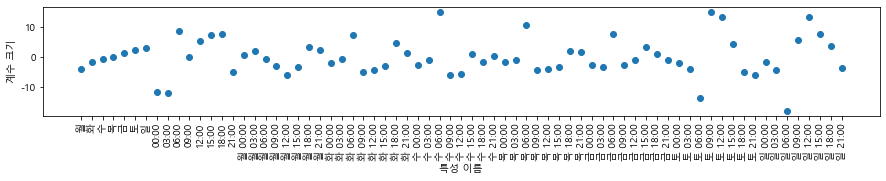

In [96]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)),features_nonzero,rotation=90)
plt.xlabel('특성 이름')
plt.ylabel('계수 크기')